# Section 2

**The Gaussian assumption** - Standard simplifying assumption asset returns are **normally** distributed. This means there is a very tiny chance (~.5%) of getting a double return or loss.

In reality, large changes are much more frequent and not normal.

## Higher Order Moments
We need to look beyond the mean & variance when it comes to returns.

- Skewness - measure of asymmetry of the distribution. 
- Kurtosis - measure of thickness of tail of distribution. For Gaussian dist, kurtosis = 3. Kurtosis > 3 is a fat-tailed distribution.




# Lab: Deviations from Normality

In [165]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
hfi = erk.get_hfi_returns()

In [167]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [168]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis='columns')

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


## Skewness

Formula for Skewness:
$$ S(R) = \frac{E [ (R-E(R))^3]}{\sigma_R^3}  $$

In [169]:
erk.skewness(hfi)

Convertible Arbitrage    -2.639592
CTA Global                0.173699
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Equity Market Neutral    -2.124435
Event Driven             -1.409154
Fixed Income Arbitrage   -3.940320
Global Macro              0.982922
Long/Short Equity        -0.390227
Merger Arbitrage         -1.320083
Relative Value           -1.815470
Short Selling             0.767975
Funds Of Funds           -0.361783
dtype: float64

In [170]:
erk.skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

### Calculating Skew with Scipy instead

In [171]:
import scipy.stats 

In [172]:
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

### Generating a random normal distribution

First we will check the shape of hfi as we want to generate this many observations for our normal distribution.

In [173]:
hfi.shape

(263, 13)

In [174]:
import numpy as np 
normal_rets = np.random.normal(0,.15, size=(263, 1)) #mean of 0, stddev of 15%, 263 observations

In [175]:
erk.skewness(normal_rets)

-0.07132853157057305

## Kurtosis

Formula for Kurtosis:
$$ K(R) = \frac{E [ (R-E(R))^4]}{\sigma_R^4}  $$

In [176]:
erk.kurtosis(normal_rets)

3.0782769831406043

In [177]:
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

### Calculating kurtosis with SciPy instead
(**Note**: it gives excess kurtosis)

In [178]:
# This is actually giving you the EXCESS kurtosis i.e. the kurtosis of dist minus three.
scipy.stats.kurtosis(normal_rets)

array([0.07827698])

### But how do you know if your returns are actually normal?

In [179]:
scipy.stats.jarque_bera(normal_rets)

(0.2901582978004314, 0.864953830256995)

In [180]:
scipy.stats.jarque_bera(hfi)

(25656.585999171326, 0.0)

In [181]:
erk.is_normal(normal_rets)

True

### .aggregate()
If we run our is_normal function on the HFI data, it doesn't really give us what we want to know. We can use a method called .aggregate on our data, which when we call our function, will return line by line details on what is normal.

In [182]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [183]:
hfi.aggregate(erk.kurtosis)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [184]:
hfi.aggregate(erk.skewness)

Convertible Arbitrage    -2.639592
CTA Global                0.173699
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Equity Market Neutral    -2.124435
Event Driven             -1.409154
Fixed Income Arbitrage   -3.940320
Global Macro              0.982922
Long/Short Equity        -0.390227
Merger Arbitrage         -1.320083
Relative Value           -1.815470
Short Selling             0.767975
Funds Of Funds           -0.361783
dtype: float64

In [185]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [186]:
erk.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [187]:
ffme.aggregate(erk.is_normal)

SmallCap    False
LargeCap    False
dtype: bool

## Downside Risk Measures
### Volatility vs Semi-Deviation
Semi-Deviation is the volatility of the sub-sample of **below-average or below-zero returns**...
because investors aren't so concerned when volatility yields profits. It tells us the average uncertainty when we are below the mean.


The calculation is straightforward - just using the standard deviation formula but only dividing by number of returns which fall **below the mean**.

## VaR (Value at Risk)
VaR represents the max "expected" loss over a given time period.

Basically, you are excluding some percent of the worst cases & then focusing on the worst possible outcomes after those exclusions.

There are at least 4 standard methods for calculating VaR:
- 1: Historical (non-parametric)
- 2: Variance-Covariance (parametric Gaussian)
- 3: Parametric Non-Gaussian
- 4: Cornish-Fisher (semi-parametric) - good compromise because it doesn't assume any particular distribution shape

# Lab: Semi Deviation, VAR and CVAR

## Downside

In [188]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [189]:
hfi = erk.get_hfi_returns()
hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


### Semi-deviation
Pretty easy really. The deviation... but only based on some of them.

In [190]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [191]:
# But we just want the deviations on those on downside, so we can apply a little filter as so.
# The filter/mask is saying "filter the returns to all those less than 0, then calc the std dev of that"
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [192]:
# After setting it up as function in our module, we can call it!
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### VaR and CVaR
Value at Risk - we'll calc using these methods:
- Historical VaR
- Parametric VaR - Gaussian
- Modified Cornish-Fisher VaR

In [193]:
# Historic VaR
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

But it's so ugly or hard to read this like.

In [194]:
def var_historic(r, level=5):
    """
    VaR Historic
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level) # negative sign because we generally report VaR as positive values.
    else: 
        raise TypeError("Expected r to be Series or DataFrame")

Wow! We got our same numbers as before, but now it's nice and tidy with labels. :)
Let's **add it to our tool kit!!!**

In [195]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [196]:
# Let's try after setting up as a function in our module.


In [197]:
erk.VaR_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [198]:
# Parametric VaR
# Look! This is how you import some part of a module, instead of the whole thing.
from scipy.stats import norm

In [199]:
# Calculates z-score based on the percentile you input e.g. 0.5 would give z-score of 0 since it's ON the mean in a norm dist.
norm.ppf(.05)

-1.6448536269514729

Value at Risk at the 5% level

In [200]:
z = norm.ppf(.05)
z

-1.6448536269514729

In [201]:
-(hfi.mean() + z*hfi.std(ddof=0))
# Remember, we want positive number for VaR which explains the minus sign above :)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [202]:
# Now, let's test a function from our module which does this calculation!
erk.VaR_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [203]:
# Cornish-Fisher
erk.VaR_gaussian(hfi, modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

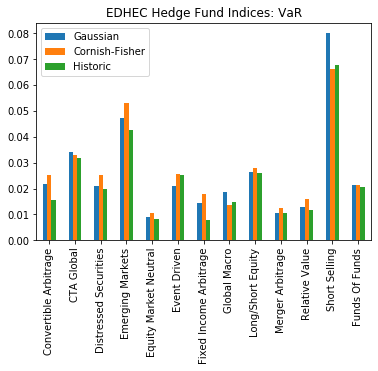

In [204]:
var_list = [erk.VaR_gaussian(hfi), erk.VaR_gaussian(hfi, modified=True), erk.VaR_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ["Gaussian", "Cornish-Fisher", "Historic"]
comparison.plot.bar(title="EDHEC Hedge Fund Indices: VaR")

### BeyondVar aka CVaR or Conditional VaR
Nothing more than the average of all the returns which are worse than the VaR.

In [209]:
# If that worse 5% happens, the avg of that is an x loss.
erk.CVaR_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64